In [49]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [3]:
%run ./util.ipynb

In [5]:
# path_funding = "/home/alex/vscode/data/original/crunchbase/funding/*.csv"
# df_funding = concat_files(path_funding, ['Organization Name'])
# df_funding.to_csv("/home/alex/vscode/data/original/crunchbase/funding/consolidado/funding.csv", index_label="index")

In [54]:
df_startup = pd.read_csv("/home/alex/vscode/data/original/crunchbase/consolidado/startups.csv", index_col="index", engine='python')
df_startup['Last Funding Date'] = df_startup['Last Funding Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") if type(x) == str else x)
df_startup['Last_Funding_Year'] = df_startup['Last Funding Date'].apply(lambda x: x.year)
# df_startup.info()
df_startup.drop(labels=["Announced Date", "Organization Name"], axis=1)
df_funding = pd.read_csv("/home/alex/vscode/data/original/crunchbase/consolidado/funding.csv", index_col="index", engine='python')
df_funding['Announced Year'] = df_funding['Announced Date'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d").year) if type(x) == str else x)
cat_type = CategoricalDtype(categories=['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E'], ordered=True)
df_funding['Funding Type'] = df_funding['Funding Type'].astype(cat_type)
df_merged = df_funding.merge(right=df_startup, on="Organization Name URL", how="inner")
# df_merged['Total Funding Amount Currency (in USD)_x']

In [80]:
df_funding.duplicated(subset=["Organization Name URL"]).sum()
# pivoted = df_funding.pivot(index="Organization Name URL", columns="Funding Type", values="Announced Date")
# difSP = pivoted['Seed'] - pivoted['Pre-Seed']
# difAS = pivoted['Series A'] - pivoted['Seed']
# difBA = pivoted['Series B'] - pivoted['Series A']
# difCB = pivoted['Series C'] - pivoted['Series B']
# dif = pd.concat([difSP, difAS, difBA, difCB], axis=1, names=["difSP", "difAS", "difBA", "difCB"])
# dif.dropna(how="all", inplace=True)
# pivoted.head(30)

0

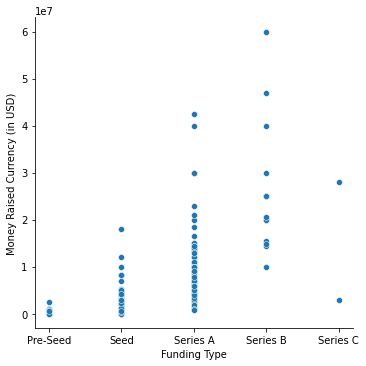

In [53]:
## Filter seed and pre-seed
# df_merged['Funding Type'].unique()
# g = sns.relplot(kind="line", x='Funding Type', y="Money Raised Currency (in USD)", data=df_merged, hue="Organization Name_x")
g = sns.relplot(kind="scatter", x='Funding Type', y="Money Raised Currency (in USD)", data=df_merged)

# g._legend.remove()

339